In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import os
import warnings
import functools
import seaborn as sns
import scipy.stats
import anndata
import tools
from tools import cmp

warnings.filterwarnings('ignore')
os.chdir(os.path.expanduser('/lustre/scratch117/cellgen/team297/kt16/Prostate_analysis/scanpy'))
sc.settings.verbosity = 3
sc.logging.print_header()

scanpy==1.7.2 anndata==0.7.6 umap==0.5.1 numpy==1.20.2 scipy==1.6.2 pandas==1.2.4 scikit-learn==0.24.2 statsmodels==0.12.2 python-igraph==0.9.1


In [2]:
# read in the crowley data
adata = sc.read_h5ad('dataset/Chen/chen_13_filtered_mnp_ingested.h5ad')

In [3]:
adata

AnnData object with n_obs × n_vars = 1401 × 2989
    obs: 'barcode', 'study', 'sample', 'group', 'scrublet_score', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'is_doublet', 'filter_rna', 'leiden', 'leiden_R', 'celltypes', 'celltype-immune'
    var: 'GeneID', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'celltype-immune_colors', 'celltypes_colors', 'dendrogram_leiden', 'dendrogram_leiden_R', 'hvg', 'leiden', 'leiden_R_colors', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'sample_colors', 'umap'
    obsm: 'X_pca', 'X_umap', 'rep'

In [4]:
len(list(set(adata.obs['sample'])))

13

In [5]:
adata.obs['celltype-immune'].value_counts()

Mac1           605
DC             476
Mac2           145
Mono           136
Mac-MT1         36
Mac-cycling      3
Name: celltype-immune, dtype: int64

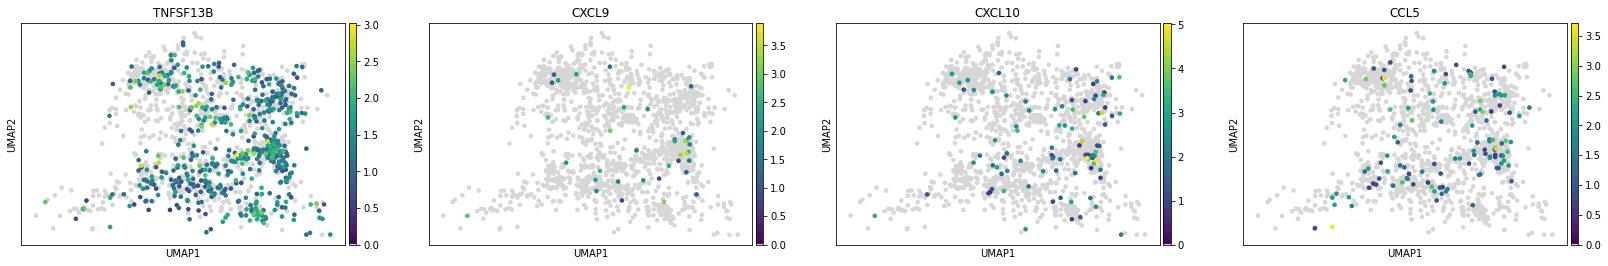

In [4]:
sc.pl.umap(adata, color = ['TNFSF13B', 'CXCL9', 'CXCL10', 'CCL5'], color_map = cmp())

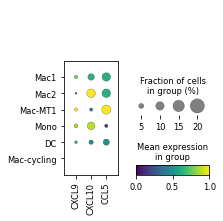

In [5]:
sc.pl.dotplot(adata, ['CXCL9', 'CXCL10', 'CCL5'], groupby = 'celltype-immune', standard_scale = 'var', color_map = 'viridis')